# Police Militarization, State Crime, and the Use of Lethal Force
### Sunil Narayan

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
#Military Transfer Frame
MTF = pd.read_csv("MilitaryTranferSpreadsheet.csv")
#State Crime Frame
SCF = pd.read_csv("StateCrimeSpreadsheet.csv")
#Lethal Force Frame
LFF = pd.read_csv("LethalForceSpreadsheet.csv")

c:\users\sunil\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (2,15,35,37,38,39,40,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Research Questions

1. How has the use of lethal force by the police changed over time?
2. How has the crime rate changed over time?
3. Has the increase in funding for equipment correlated with a change in either of these trends?

## Preparing Datasets

In [2]:
MTF = MTF.loc[:,['Cost', 'Ship Date']]

In [3]:
MTF['Ship Date'] = MTF['Ship Date'].str[-4:]

In [4]:
MTF['Ship Date'] = MTF['Ship Date'].astype(int)

In [5]:
MTF = MTF.rename(columns = {"Ship Date" : "Year"})

In [6]:
MTF = MTF[MTF.Year>=2000]
MTF = MTF[MTF.Year<=2014]

In [7]:
MTF = MTF.groupby('Year', as_index = False).sum()

In [8]:
MTF.head(16)

,Year,Cost
0,2000,7.063179e+06
1,2001,3.175171e+06
2,2002,2.427223e+06
3,2003,9.652189e+06
4,2004,5.990546e+06
5,2005,1.021858e+07
6,2006,3.071283e+07
7,2007,1.209909e+07
8,2008,4.017015e+07
9,2009,2.640902e+07


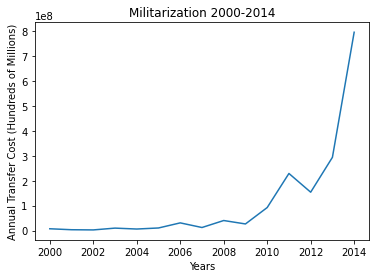

In [9]:
x = MTF["Year"]
y = MTF["Cost"]

plt.title('Militarization 2000-2014')
plt.xlabel('Years')
plt.ylabel('Annual Transfer Cost (Hundreds of Millions)')

plt.plot(x,y)
plt.show()

In [10]:
SCF = SCF.loc[:,['report_year', 'violent_crimes']]

In [11]:
SCF = SCF.rename(columns = {"report_year" : "Year", "violent_crimes" : "Crimes"})

In [12]:
SCF = SCF[SCF.Year>=2000]
SCF = SCF[SCF.Year<=2014]

In [13]:
SCF = SCF.groupby('Year', as_index = False).sum()

In [14]:
SCF.head(16)

,Year,Crimes
0,2000,1999863.0
1,2001,2014008.0
2,2002,1985342.0
3,2003,1917072.0
4,2004,1873245.0
5,2005,1906871.0
6,2006,1957346.0
7,2007,1934105.0
8,2008,1892222.0
9,2009,1789882.0


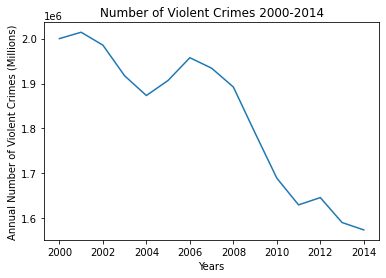

In [15]:
x = SCF["Year"]
y = SCF["Crimes"]

plt.title('Number of Violent Crimes 2000-2014')
plt.xlabel('Years')
plt.ylabel('Annual Number of Violent Crimes (Millions)')

plt.plot(x,y)
plt.show()

In [16]:
LFF = LFF.loc[:,['Date of injury resulting in death (month/day/year)']]

In [17]:
LFF = LFF.rename(columns = {"Date of injury resulting in death (month/day/year)" : "Year"})

In [18]:
LFF['Year'] = LFF['Year'].str[-4:]
LFF['Year'] = LFF['Year'].astype(int)

In [19]:
LFF = LFF[LFF.Year>=2000]
LFF = LFF[LFF.Year<=2014]

In [20]:
LFF = LFF.Year.value_counts().to_frame()

In [21]:
LFF = LFF.reset_index()

In [22]:
LFF = LFF.rename(columns = {"Year":"Deaths" })
LFF = LFF.rename(columns = {"index":"Year" })

In [23]:
LFF = LFF.sort_values("Year")

In [24]:
LFF.head(16)

,Year,Deaths
14,2000,860
13,2001,923
12,2002,987
10,2003,1061
11,2004,1037
9,2005,1169
5,2006,1270
7,2007,1257
8,2008,1211
6,2009,1259


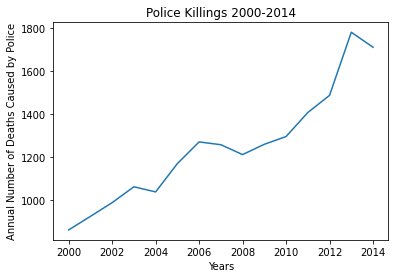

In [25]:
x = LFF["Year"]
y = LFF["Deaths"]

plt.title('Police Killings 2000-2014')
plt.xlabel('Years')
plt.ylabel('Annual Number of Deaths Caused by Police')

plt.plot(x,y)
plt.show()

## Visualizing Data

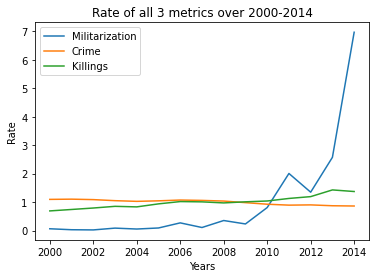

In [26]:
x = MTF["Year"]
y = MTF["Cost"]/MTF["Cost"].mean()
x2 = SCF["Year"]
y2 = SCF["Crimes"]/SCF["Crimes"].mean()
x3 = LFF["Year"]
y3 = LFF["Deaths"]/LFF["Deaths"].mean()

plt.xlabel("Years")
plt.ylabel("Rate")
plt.title("Rate of all 3 metrics over 2000-2014")
plt.plot(x,y,label="Militarization")
plt.plot(x2,y2,label="Crime")
plt.plot(x3,y3,label="Killings")
plt.legend()
plt.show()

## Answering Q1

How has the use of lethal force by the police changed over time?

In [27]:
LFF2 = pd.read_csv("LethalForceSpreadsheet.csv")
LFF2 = LFF2.loc[:,['Date of injury resulting in death (month/day/year)']]
LFF2 = LFF2.rename(columns = {"Date of injury resulting in death (month/day/year)" : "Year"})
LFF2['Year'] = LFF2['Year'].str[-4:]
LFF2['Year'] = LFF2['Year'].astype(int)

c:\users\sunil\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (2,15,35,37,38,39,40,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
LFF2 = LFF2.Year.value_counts().to_frame()
LFF2 = LFF2.reset_index()
LFF2 = LFF2.rename(columns = {"Year":"Deaths" })
LFF2 = LFF2.rename(columns = {"index":"Year" })
LFF2 = LFF2.sort_values("Year")
LFF2 = LFF2[LFF2.Year>=2000]
LFF2 = LFF2[LFF2.Year<=2020]

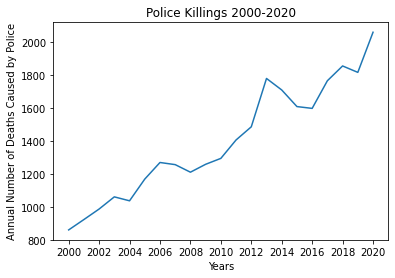

In [29]:
x = LFF2["Year"]
y = LFF2["Deaths"]

plt.title('Police Killings 2000-2020')
plt.xlabel('Years')
plt.ylabel('Annual Number of Deaths Caused by Police')

plt.plot(x,y)
plt.xticks(range(2000, 2021, 2))
plt.show()

In [30]:
stats.pearsonr(LFF2["Deaths"], LFF2["Year"])

(0.9708353382237427, 3.046295545058456e-13)

Answer: Seems to be a strong upward trend in deaths per year over time. Note, however, that this is not data stretching back before the creation of the 1033 program, so we don't know if this is a new trend or the continuation of an existing one.

## Answering Q2

How has the crime rate changed over time?

In [31]:
SCF2 = pd.read_csv("StateCrimeSpreadsheet.csv")

In [32]:
SCF2 = SCF2.loc[:,['report_year', 'violent_crimes']]
SCF2 = SCF2.rename(columns = {"report_year" : "Year", "violent_crimes" : "Crimes"})
SCF2 = SCF2.groupby('Year', as_index = False).sum()

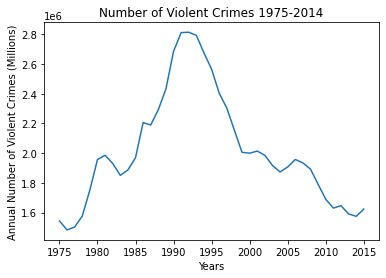

In [33]:
x = SCF2["Year"]
y = SCF2["Crimes"]

plt.title('Number of Violent Crimes 1975-2014')
plt.xlabel('Years')
plt.ylabel('Annual Number of Violent Crimes (Millions)')

plt.plot(x,y)
plt.show()

This is fascinating, as it seems to show that the crime rate peaked in the 90's and has fallen since then. New question: did this reversal happen as a result of instituting the 1033 program?

In [34]:
Post1033 = SCF2[SCF2.Year>=1997]
Pre1033 = SCF2[SCF2.Year<=1997]

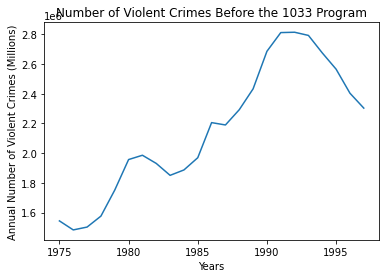

In [35]:
x = Pre1033["Year"]
y = Pre1033["Crimes"]

plt.title('Number of Violent Crimes Before the 1033 Program')
plt.xlabel('Years')
plt.ylabel('Annual Number of Violent Crimes (Millions)')

plt.plot(x,y)
plt.show()

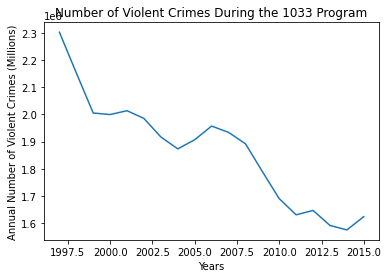

In [36]:
x = Post1033["Year"]
y = Post1033["Crimes"]

plt.title('Number of Violent Crimes During the 1033 Program')
plt.xlabel('Years')
plt.ylabel('Annual Number of Violent Crimes (Millions)')

plt.plot(x,y)
plt.show()

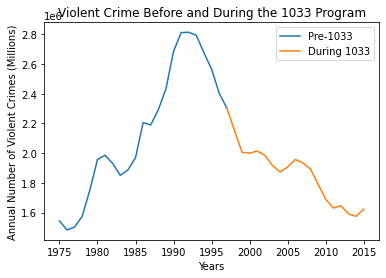

In [37]:
x = Pre1033["Year"]
y = Pre1033["Crimes"]
x2 = Post1033["Year"]
y2 = Post1033["Crimes"]

plt.xlabel("Years")
plt.ylabel("Annual Number of Violent Crimes (Millions)")
plt.title("Violent Crime Before and During the 1033 Program")
plt.plot(x,y,label="Pre-1033")
plt.plot(x2,y2,label="During 1033")
plt.legend()
plt.show()

It seems that the downward trend in crime since instituting the program is a continuation of a crime rate which was already falling, let's zoom in on that part:

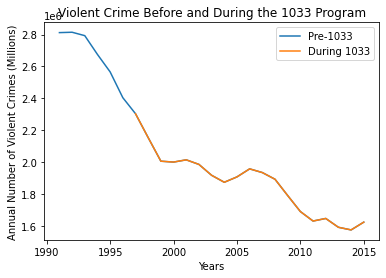

In [38]:
Post1033 = SCF2[SCF2.Year>=1997]
Pre1033 = SCF2[SCF2.Year<=1997]
Pre1033 = SCF2[SCF2.Year>=1991]

x = Pre1033["Year"]
y = Pre1033["Crimes"]
x2 = Post1033["Year"]
y2 = Post1033["Crimes"]

plt.xlabel("Years")
plt.ylabel("Annual Number of Violent Crimes (Millions)")
plt.title("Violent Crime Before and During the 1033 Program")
plt.plot(x,y,label="Pre-1033")
plt.plot(x2,y2,label="During 1033")
plt.legend()
plt.show()

New question: was the fall in crime from 1997-2015 caused by the 1033 program, or was it an extension of the fall that had already begun in 1991?

In [39]:
stats.pearsonr(Pre1033["Crimes"], Pre1033["Year"])

(-0.9438789638122997, 1.4927193302739846e-12)

In [40]:
stats.pearsonr(Post1033["Crimes"], Post1033["Year"])

(-0.94372258752651, 1.3612923475724907e-09)

The corrilation between crime rate and time seems to be very similar before (-0.9439) and after (-0.9437) the start of the 1033 program. This is not techically a statistically significant test, but based on that as well as the shape of the graph, it does seem like the program did not cause a significant difference in the rate of change of crime over time

Note that the [NDAA for 1991](https://www.govtrack.us/congress/bills/101/hr2461/text) (see section 1208) contained the precursor for the 1033 program, which is a possible explaination for the decrease in crime starting that year, and thus validating the transfer of small arms as a viable means of combating crime

New question: if we expand the scope of "police militarization" to include all DoD transfers, not just those under the 1033 program but also under its precursor, the 1208 program, does the data show a difference between the pre-transfer and post-transfer crime rate?

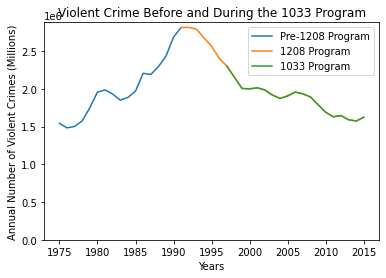

In [41]:
During1033 = SCF2[SCF2.Year>=1997]
During1208 = SCF2[SCF2.Year<=1997]
During1208 = SCF2[SCF2.Year>=1991]
Pre1208 = SCF2[SCF2.Year<=1991]


x = Pre1208["Year"]
y = Pre1208["Crimes"]
x2 = During1208["Year"]
y2 = During1208["Crimes"]
x3 = During1033["Year"]
y3 = During1033["Crimes"]

plt.xlabel("Years")
plt.ylabel("Annual Number of Violent Crimes (Millions)")
plt.title("Violent Crime Before and During the 1033 Program")
plt.plot(x,y,label="Pre-1208 Program")
plt.plot(x2,y2,label="1208 Program")
plt.plot(x3,y3,label="1033 Program")
plt.yticks(range(0, 3000000, 500000))
plt.legend()
plt.show()


Including the 1280 program seems to provide a much stronger case for militarization stopping violent crime, as evidenced by the obvious downward shift in crime through its duration and into the duration of the 1033 program. 

New Question: Is it warrented to classify the 1208 program as a legitimate force on the level of the 1033 program despite its limited scope?

Some background here: the 1208 program was more stringent in how equipment was to be approved to be transferred, thus making it a weaker force contributing to militarization than the 1033 program. In order to measure the difference, lets look at the total cost of transfers per year from 1991 (the start of the 1208 program) to the present day.

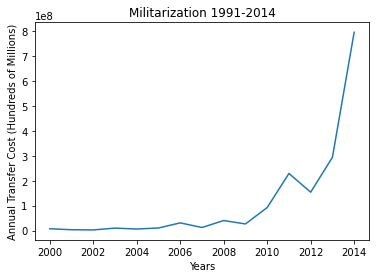

In [42]:
MTF2 = pd.read_csv("MilitaryTranferSpreadsheet.csv")
MTF2 = MTF2.loc[:,['Cost', 'Ship Date']]
MTF2['Ship Date'] = MTF2['Ship Date'].str[-4:]
MTF2['Ship Date'] = MTF2['Ship Date'].astype(int)
MTF2 = MTF2.rename(columns = {"Ship Date" : "Year"})
MTF2 = MTF2[MTF2.Year<=2014]
MTF2 = MTF2.groupby('Year', as_index = False).sum()\

x = MTF["Year"]
y = MTF["Cost"]

plt.title('Militarization 1991-2014')
plt.xlabel('Years')
plt.ylabel('Annual Transfer Cost (Hundreds of Millions)')

plt.plot(x,y)
plt.show()

In looking for a difference between the levels of militarization under the 1208 program and the 1033 program, there doesnt appear to be a significant difference between the years of 1991-1997 and 1997-2005. The major feature of this graph is the drastic increase in transfers from the late 2000's onwards,  but this happens well after the start of the 1033 program. For the purposes of determining if the negative corrilation between militarizaion and crime levels should be disqualified based on being part of a previous trend, this graph shows that the years of 1991-1997 should not be treated as catagorically different than the years of 1997 onwards.  

## Answering Q3

Has the increase in funding for military equipment correlated with a change in either of these trends?

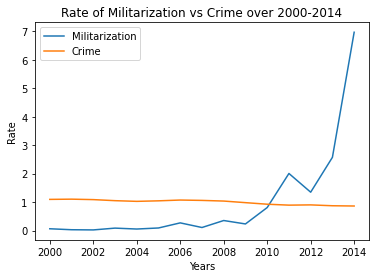

In [43]:
x = MTF["Year"]
y = MTF["Cost"]/MTF["Cost"].mean()
x2 = SCF["Year"]
y2 = SCF["Crimes"]/SCF["Crimes"].mean()

plt.xlabel("Years")
plt.ylabel("Rate")
plt.title("Rate of Militarization vs Crime over 2000-2014")
plt.plot(x,y,label="Militarization")
plt.plot(x2,y2,label="Crime")
plt.legend()
plt.show()

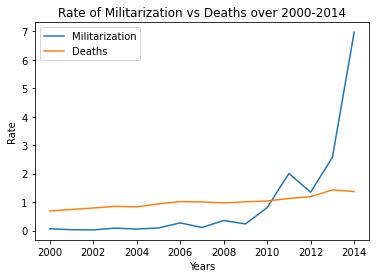

In [44]:
x = MTF["Year"]
y = MTF["Cost"]/MTF["Cost"].mean()
x2 = LFF["Year"]
y2 = LFF["Deaths"]/LFF["Deaths"].mean()

plt.xlabel("Years")
plt.ylabel("Rate")
plt.title("Rate of Militarization vs Deaths over 2000-2014")
plt.plot(x,y,label="Militarization")
plt.plot(x2,y2,label="Deaths")
plt.legend()
plt.show()

In [45]:
CrimeCorrilation = stats.pearsonr(MTF["Cost"], SCF["Crimes"])
DeathsCorrilation = stats.pearsonr(MTF["Cost"], LFF["Deaths"])

In [46]:
print("The corrilation between the annual amount of military equipment transferred and state crime rate is:", CrimeCorrilation)
print("The corrilation between the annual amount of military equipment transferred and rate of lethal force is", DeathsCorrilation)

The corrilation between the annual amount of military equipment transferred and state crime rate is: (-0.7433680761523075, 0.0014921185209890435)
The corrilation between the annual amount of military equipment transferred and rate of lethal force is (0.7614336024642523, 0.000973761918409527)


Answer: Yes, the increase in the amount of military equipment transferred over time has corrilated with both a statistically significant decrease in the crime rate and a statistically significant increase in the number of police uses of lethal force